Task 1:

Before applying the eCDF, we applied two filters on the given data:

1. Filter for r-band of points smaller than 17.7
2. Filter for redshift 0.08< z < 0.12. We focus on this specific range since the density is more here and we can study data efficiently and we want a complete set. By complete set we mean that we focus on this area since the characteristics of points are clear and can be more relatable. 
Also by increasing the volume we know that the survey might cover more galaxies and since we would have more comprehensive view of the universe.

Then we simply plotted the r-band vs redshift.

For the porpuse of eCDF, we know that we simply plot sorted data against the data -1
The numpy arrange function specifically does so on sorted data.


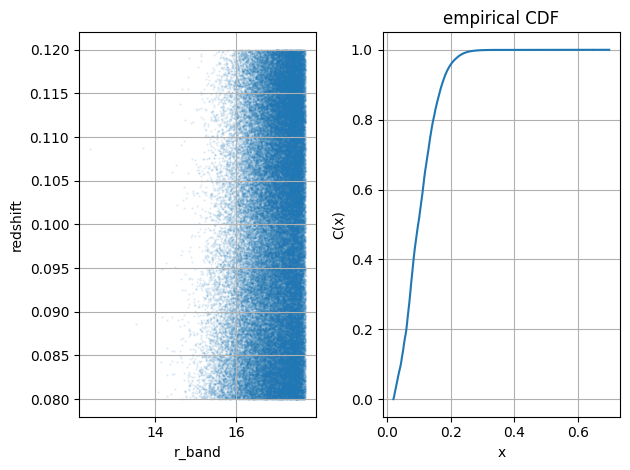

In [8]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as plt
import scipy.special as sp

#Importing data
redshift = nmp.loadtxt("C:/UNIVIE/VU Data Science in Astrophysiks/data.csv", skiprows=1, delimiter=',', usecols=(2))

r_band = nmp.loadtxt("C:/UNIVIE/VU Data Science in Astrophysiks/data.csv", skiprows=1, delimiter=',', usecols=(5))


#condition for the r_band to values < 17.7
ConditionR_band = r_band<17.7
LimitedR_band = r_band[ConditionR_band]
LimitedRedShift = redshift[ConditionR_band]

#condition for redshift (0.08<z<0.12)
ConditionRedshift1 = LimitedRedShift>0.08 
ConditionRedshift12 = LimitedRedShift<0.12
ConditionRedshift = nmp.logical_and(ConditionRedshift1,ConditionRedshift12)
FinalR_band = LimitedR_band[ConditionRedshift]
FinalRedshift = LimitedRedShift[ConditionRedshift]



#plot
plt.figure()
plt.subplot(1,2,1)
plt.scatter(FinalR_band, FinalRedshift, s=0.5, alpha=0.1)
plt.xlabel('r_band')
plt.ylabel('redshift')
plt.grid(True)


SortedData = nmp.sort(LimitedRedShift)
plt.subplot(1,2,2)
#numpy arrange function returns values from 0 upto length of sorted data - 1. 
#which is defination of ECDF
plt.step(SortedData, nmp.arange(len(SortedData))/len(SortedData), label='eCDF')
plt.xlabel('x')
plt.ylabel('C(x)')
plt.title('empirical CDF')
plt.grid(True)

plt.tight_layout()
plt.show()

Task 2:
In this task, after applying the previous filters we applied the color condition for our data to split the data to red samples and blue samples according to the given condition.

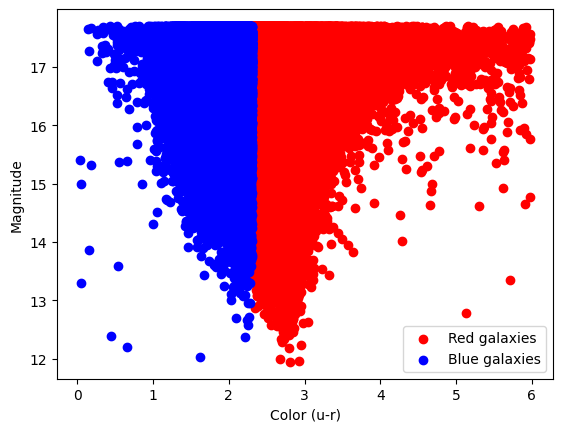

In [9]:
#Loading data to program
data_u = nmp.genfromtxt("C:/UNIVIE/VU Data Science in Astrophysiks/data.csv", skip_header=1, delimiter=',', usecols=(3))
data_r = nmp.genfromtxt("C:/UNIVIE/VU Data Science in Astrophysiks/data.csv", skip_header=1, delimiter=',', usecols=(5))

#condition for the r_band to values < 17.7
ConditionR_band = data_r<17.7
LimitedR_band = data_r[ConditionR_band]
LimitedU_band = data_u[ConditionR_band]

#u-r values array
URDiff = LimitedU_band-LimitedR_band

#Grouping of red galaxies
red_condition = URDiff > 2.3
red_sample = URDiff[red_condition]

#Grouping of blue galaxies
blue_condition = URDiff <= 2.3
blue_sample = URDiff[blue_condition]

#Sorting not necessary since we are concerned about analysis of clusters (red, blue)

plt.figure()
#Note: In order to get specific magnitudes of each color data, we also included the condition on magnitude values
plt.scatter( red_sample, LimitedR_band[URDiff>2.3],c='red',label='Red galaxies')
plt.scatter( blue_sample,LimitedR_band[URDiff<=2.3], c='blue', label='Blue galaxies')
plt.xlabel('Color (u-r)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

Task 3:
We calculated the mean and standard deviation for the two samples separately. For mean calculation we used the conventional method of adding and deviding by the total number of data. However for standard deviation we used the numpy.std method which returns the standard deviation of the given dataset.

By results we can conceive the following:
1. The louminusity of red samples is lower than the luminusity of blue samples, since the mean of red samples is slightly less than the mean of blue ones. Stating that red samples are old ones, and since they have more age than the blue samples, they lost their luminousity than the blue samples.

2. The standard deviation shows the uniformity and spread of a dataset. Here the standard deviation of red galaxies are more than the blue ones, therefor we can say that blue galaxies are more consistent and uniform in their luminosity values than the red ones.

In [10]:
#condition for the r_band to values < 17.7
ConditionR_band = data_r<17.7
LimitedR_band = data_r[ConditionR_band]
LimitedU_band = data_u[ConditionR_band]


#u-r values array
URDiff = LimitedU_band-LimitedR_band

#Computing the mean for r-magnitude, here data-r (each group separately)
"""nmp.std: Returns the standard deviation, a measure of the spread of a distribution of the array elements. The standard deviation is 
computed for the flattened array by default, otherwise over the specified axis.(Defination of built in library of numpy)"""
#1. Red samples:
meanR = sum(LimitedR_band[URDiff>2.3])/len(LimitedR_band[URDiff>2.3])
standardDeviationR = nmp.std(LimitedR_band[URDiff>2.3])
print("Mean for the red samples is: " ,meanR)
print("Standard deviation for the red samples is: " ,standardDeviationR)

#2. Blue samples:
meanB = sum(LimitedR_band[URDiff<=2.3])/len(LimitedR_band[URDiff<=2.3])
standardDeviationB = nmp.std(LimitedR_band[URDiff<=2.3])
print("Mean for the blue samples is: " ,meanB)
print("Standard deviation for the blue samples is: " ,standardDeviationB)

Mean for the red samples is:  16.836919573461707
Standard deviation for the red samples is:  0.7420809417159567
Mean for the blue samples is:  16.95494022153762
Standard deviation for the blue samples is:  0.6504956764976614


Task 4:
In this task we applied the filters not only on the r-band and u-band, but also on RA, DEC, and Redshift. And after that we plotted the graphs accordingly.

The angular space map, represents the distribution of galaxies as catched from the survey. We can see how the galaxies are clusterd or can see their structure. 
1. The red galaxies are more clustered and dense together, and that is intuitive since they are older than the blue ones. 
2. On the other hand, in blue samples we have less galaxies and more voids between them and the clustering is weak.

The Redshift space map represents the distribution as well, but since we have redshift (the effect of the velocity of galaxy), it can also give as information about velocity.
- The red galaxies are more dense sense they are more clustered as can be seen in comparison to blue ones. So they have more velocity than the blue samples.

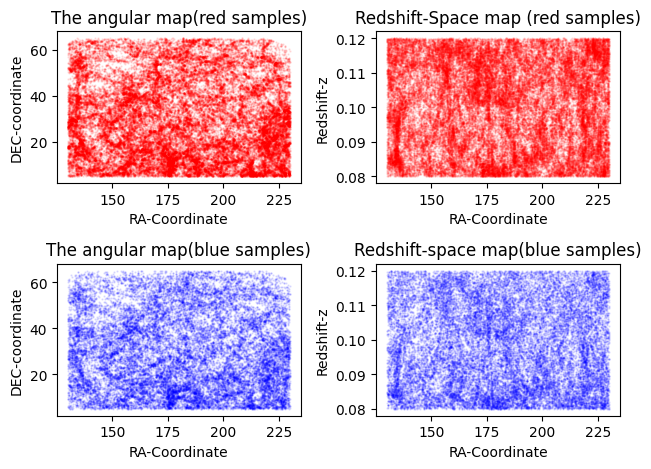

In [11]:
dataRA = nmp.genfromtxt(r"C:\UNIVIE\VU Data Science in Astrophysiks\data.csv", delimiter=',', skip_header= 1, usecols=(0))
dataDEC = nmp.genfromtxt(r"C:\UNIVIE\VU Data Science in Astrophysiks\data.csv", delimiter=',', skip_header= 1, usecols=(1))
dataRedshiftZ = nmp.genfromtxt(r"C:\UNIVIE\VU Data Science in Astrophysiks\data.csv", delimiter=',', skip_header= 1, usecols=(2))

#condition for the r_band to values < 17.7
ConditionR_band = data_r<17.7
LimitedR_band = data_r[ConditionR_band]
LimitedRedShift = dataRedshiftZ[ConditionR_band]
LimitedU_band = data_u[ConditionR_band]
LimitedRA = dataRA[ConditionR_band]
LimitedDEC = dataDEC[ConditionR_band]

#condition for redshift (0.08<z<0.12)
ConditionRedshift1 = LimitedRedShift>0.08 
ConditionRedshift12 = LimitedRedShift<0.12
ConditionRedshift = nmp.logical_and(ConditionRedshift1,ConditionRedshift12)
FinalR_band = LimitedR_band[ConditionRedshift]
FinalRedshift = LimitedRedShift[ConditionRedshift]
FinalU_band = LimitedU_band[ConditionRedshift]
FinalRA = LimitedRA[ConditionRedshift]
FinalDEC = LimitedDEC[ConditionRedshift]


#creating the u-r array
URRD = FinalU_band - FinalR_band

#Categorizing the colors (Red, Blue):

#1. Red samples
RedCondition = URRD>2.3 
RA_Red = FinalRA[RedCondition]
DEC_Red = FinalDEC[RedCondition]
RedshiftZ_Red = FinalRedshift[RedCondition]

#2. Blue samples
BlueCondition = URRD<=2.3
RA_Blue = FinalRA[BlueCondition]
DEC_Blue = FinalDEC[BlueCondition]
RedshiftZ_Blue = FinalRedshift[BlueCondition]

#Plotting:
plt.figure()
#red samples
#angular map
plt.subplot(2,2,1)
plt.scatter(RA_Red, DEC_Red, alpha=0.1, s=0.5, c='red')
plt.title('The angular map(red samples)')
plt.xlabel('RA-Coordinate')
plt.ylabel('DEC-coordinate')
#redshift-space map
plt.subplot(2,2,2)
plt.scatter(RA_Red, RedshiftZ_Red, s=0.5, alpha=0.1, c='red')
plt.title('Redshift-Space map (red samples)')
plt.xlabel('RA-Coordinate')
plt.ylabel('Redshift-z')


#blue samples
#angular map
plt.subplot(2,2,3)
plt.scatter(RA_Blue, DEC_Blue, s=0.5, alpha=0.1, c='blue')
plt.title('The angular map(blue samples)')
plt.xlabel('RA-Coordinate')
plt.ylabel('DEC-coordinate')
#redshift-space map
plt.subplot(2,2,4)
plt.scatter(RA_Blue, RedshiftZ_Blue, s=0.5, alpha=0.1, c='blue')
plt.title('Redshift-space map(blue samples)')
plt.xlabel('RA-Coordinate')
plt.ylabel('Redshift-z')

plt.tight_layout()
plt.show()